#Imports


In [77]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#Upload the dataset
This dataset is available for free on kaggle for simple machine learning classifiers


In [44]:
from google.colab import files
import io
uploaded = files.upload()



Saving Housing.csv to Housing (1).csv


In [78]:
data = pd.read_csv(io.BytesIO(uploaded['Housing (1).csv']))

In [79]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


#Visualization

▶ Necessary to understand the data ✅

▶ There are several types of dataplots and visualization but here I chose to visualize the distribution of price ✅

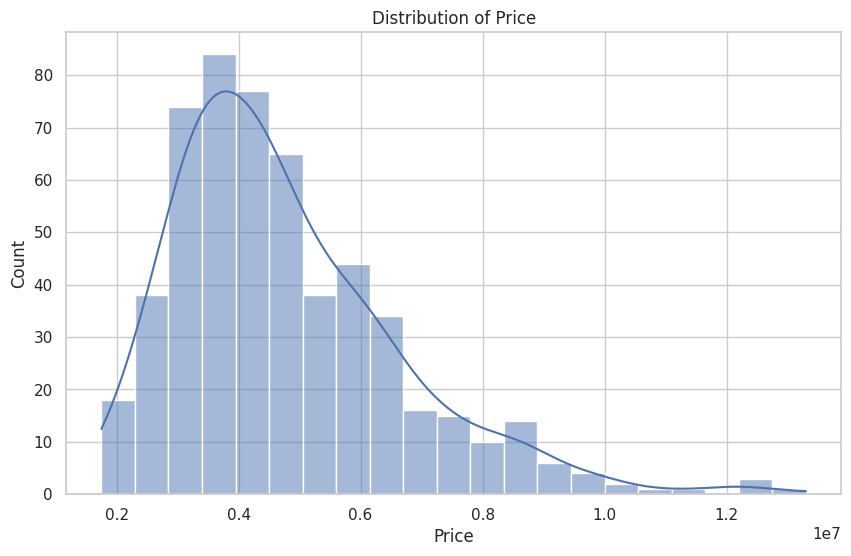

In [80]:
plt.figure(figsize=(10, 6))
sns.histplot(data["price"], kde=True)
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Distribution of Price")
plt.show()

#Training & Evaluating
▶ Here, I'm taining the models with a 80% train and 20% test splits. ✅

▶ Using R2-Score to evaluate and compare the models. ✅

▶ There are several methods to evluate your models other than the R2-score and each one of them is calculated differently & off course, one measure is not enough. ✅

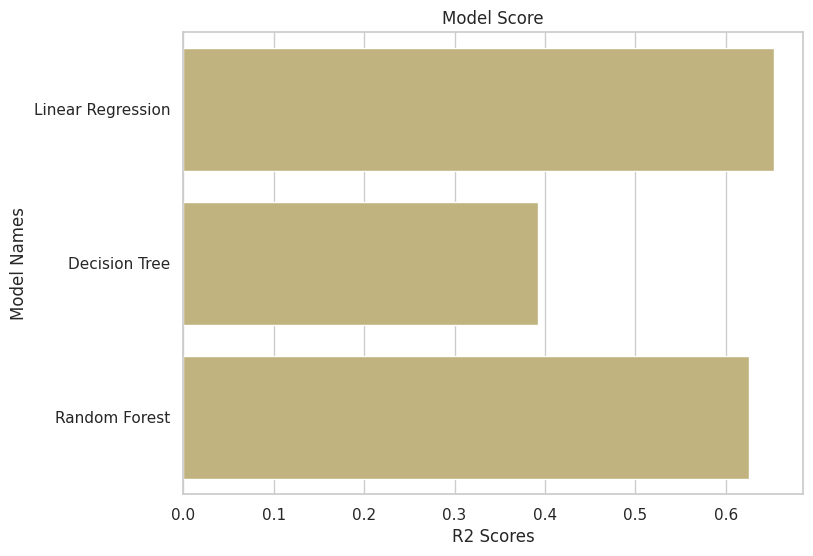

In [81]:
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

furnishing_status_ohe = pd.get_dummies(data['furnishingstatus'], prefix='furnishing')
data = pd.concat([data, furnishing_status_ohe], axis=1)
data.drop('furnishingstatus', axis=1, inplace=True)

X = data.drop('price', axis=1)
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

Name = ['Linear Regression','Decision Tree','Random Forest']
R2_Sc = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    R2_Score = r2_score(y_test, y_pred)
    R2_Sc.append(R2_Score)
data = pd.DataFrame({"Names": Name, "R2_Score": R2_Sc})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

sns.barplot(x="R2_Score", y="Names", data=data, color="y")

plt.xlabel("R2 Scores")
plt.ylabel("Model Names")
plt.title("Model Score")

plt.show()

